In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [2]:
from sklearn.svm import SVC

In [4]:
from ae_feature_extractor import autoencoder
ae = autoencoder ()

## Chest and Wrist Physio modalities classification

In [5]:
# use chest and wrist features for classification
scores_all = []
cms = []
for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.809052333804809
f1 score:  0.8092901781324163

subject  3
accuracy:  0.8291550603528319
f1 score:  0.8266260817299377

subject  4
accuracy:  0.8277136258660508
f1 score:  0.7535782129543559

subject  5
accuracy:  0.9806044203879116
f1 score:  0.9805423748570404

subject  6
accuracy:  0.9450499545867393
f1 score:  0.9454100437102336

subject  7
accuracy:  0.8307552320291174
f1 score:  0.7582318001187909

subject  8
accuracy:  0.7282608695652174
f1 score:  0.6795841413768519

subject  9
accuracy:  0.9863450159308147
f1 score:  0.9863050862800318

subject  10
accuracy:  0.8107158541941151
f1 score:  0.7520788892376755

subject  11
accuracy:  0.9658733722496632
f1 score:  0.9658658860405045

subject  13
accuracy:  0.862084456424079
f1 score:  0.8237808543595323

subject  14
accuracy:  0.8172429277054333
f1 score:  0.7858376710804772

subject  15
accuracy:  0.8302731751007613
f1 score:  0.759384970495074

subject  16
accuracy:  0.9860423232778028
f1 score:  0.9860022

In [6]:
np.array(scores_all)[:,1].mean() #accuracy

0.8596680662705882

In [7]:
np.array(scores_all)[:,1].std()

0.09059382941139345

In [8]:
np.array(scores_all)[:,2].mean() #f1-score

0.8320102236321605

In [9]:
np.array(scores_all)[:,2].std()

0.10850964666567264

### Confusion Matrices per subject and for all subjects combined

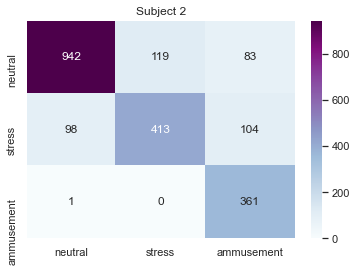

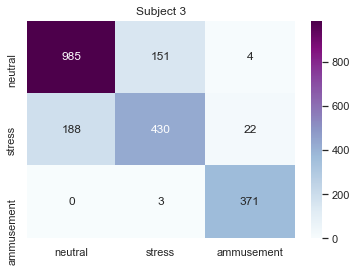

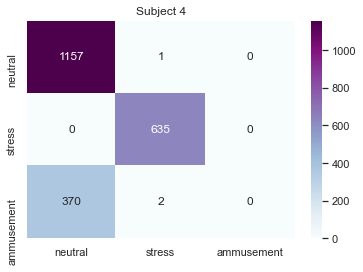

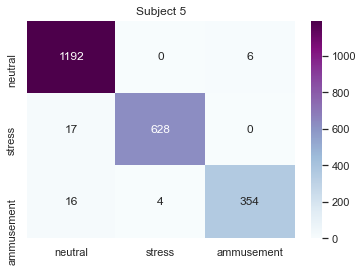

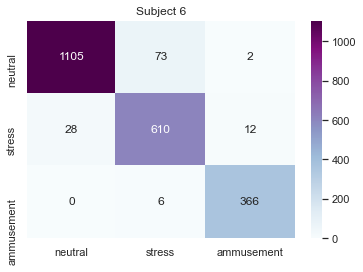

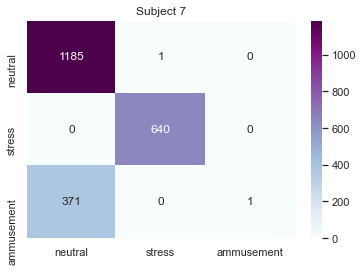

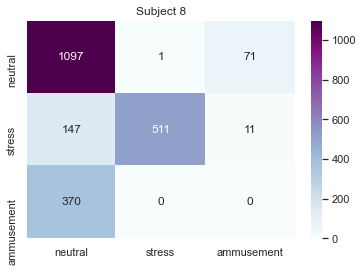

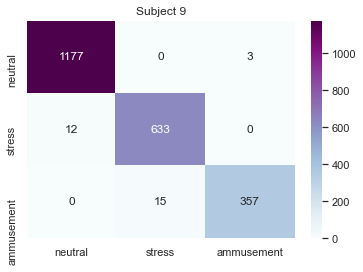

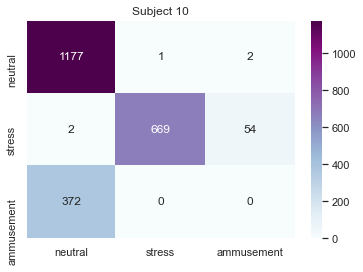

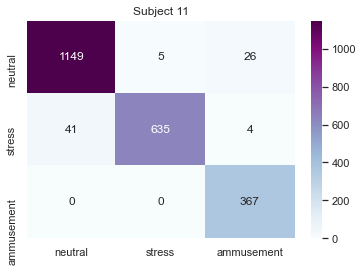

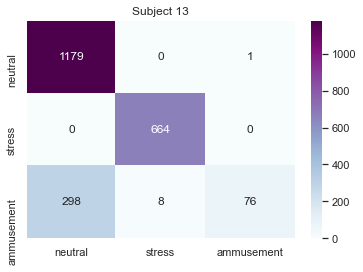

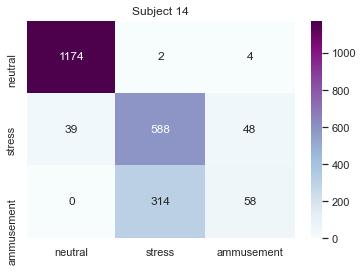

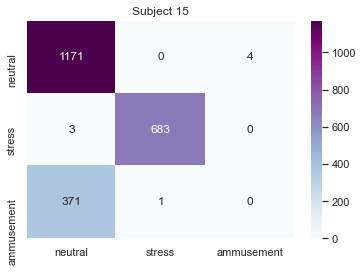

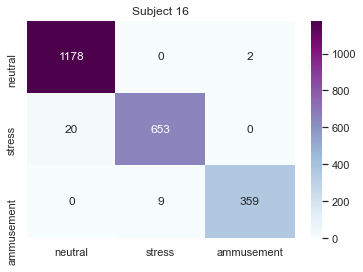

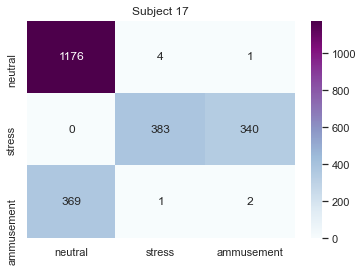

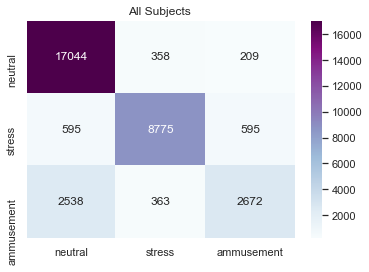

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [37]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:80]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_c.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.6562942008486563
f1 score:  0.6429621036179983

subject  3
accuracy:  0.7571959145775302
f1 score:  0.7498378329504451

subject  4
accuracy:  0.8240184757505774
f1 score:  0.7514936714506771

subject  5
accuracy:  0.9603067207938656
f1 score:  0.9597111161993396

subject  6
accuracy:  0.871480472297911
f1 score:  0.8680075725719774

subject  7
accuracy:  0.8307552320291174
f1 score:  0.7584524178477099

subject  8
accuracy:  0.4855072463768116
f1 score:  0.474413738044143

subject  9
accuracy:  0.8179335457441966
f1 score:  0.7877186587390319

subject  10
accuracy:  0.8155467720685112
f1 score:  0.755865563865525

subject  11
accuracy:  0.9775482712168837
f1 score:  0.9777519249868806

subject  13
accuracy:  0.8530997304582211
f1 score:  0.8069529843488095

subject  14
accuracy:  0.7597665020206555
f1 score:  0.755091048820954

subject  15
accuracy:  0.8325123152709359
f1 score:  0.758483936851252

subject  16
accuracy:  0.9878433138226025
f1 score:  0.987774418

In [39]:
np.array(scores_c)[:,1].mean() #accuracy

0.8176111491334873

In [40]:
np.array(scores_c)[:,1].std()

0.12196040666685316

In [42]:
np.array(scores_c)[:,2].mean() #f1-score

0.7865387332761156

In [43]:
np.array(scores_c)[:,2].std()

0.12616052997963323

### Confusion Matrices per subject and for all subjects combined

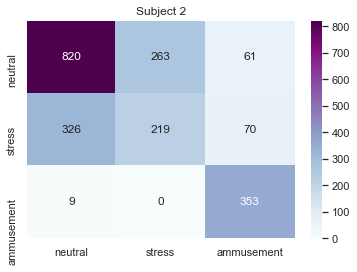

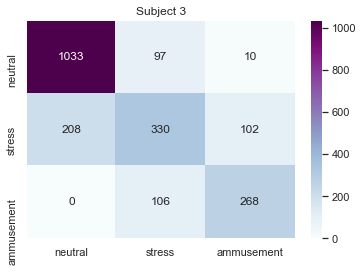

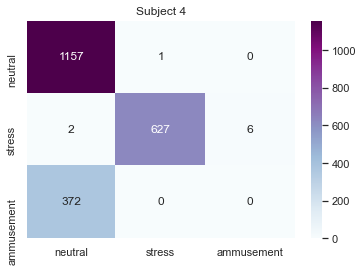

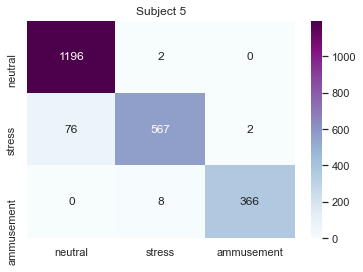

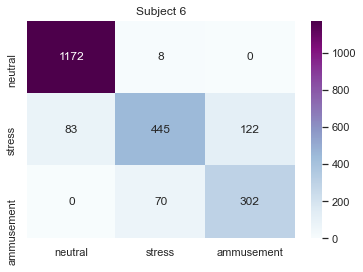

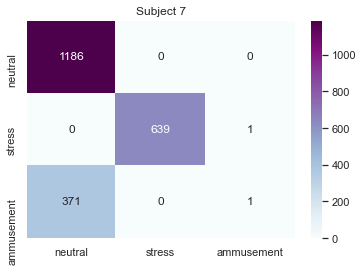

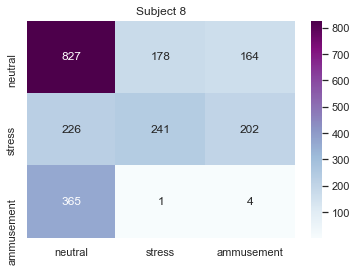

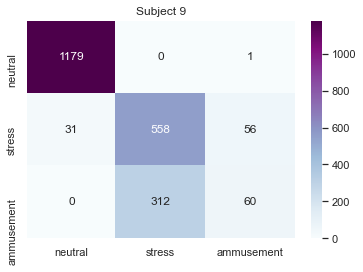

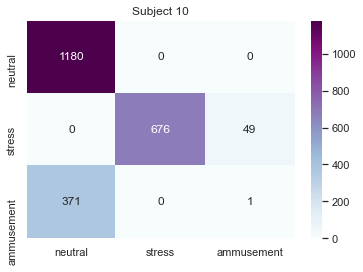

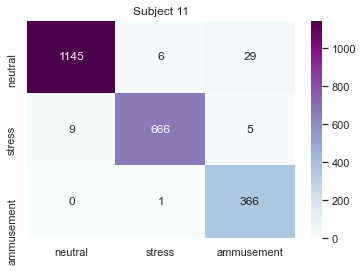

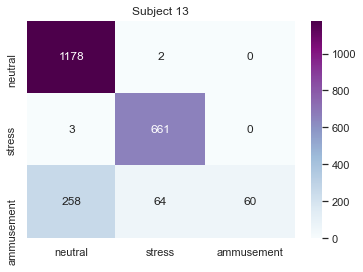

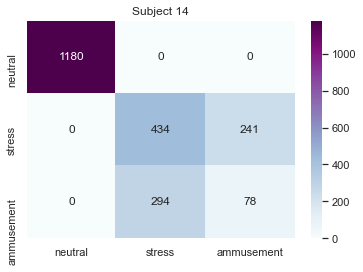

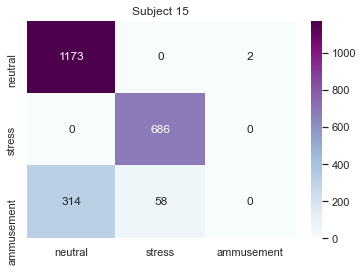

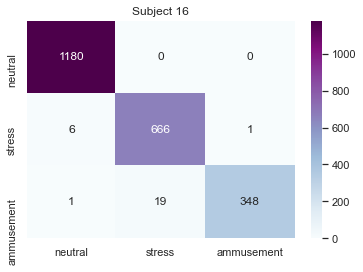

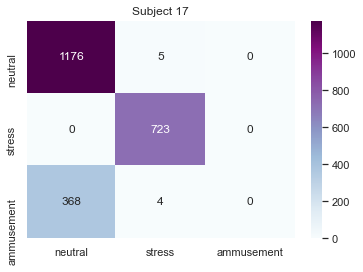

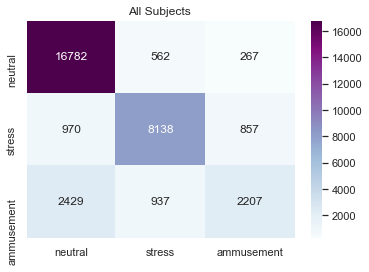

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [45]:
# use wrist only features for classification
scores_w = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,80:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,80:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC()
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_w.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.8081093823668081
f1 score:  0.7830607389215241

subject  3
accuracy:  0.6309192200557103
f1 score:  0.5955808941473612

subject  4
accuracy:  0.8235565819861432
f1 score:  0.7497333550642303

subject  5
accuracy:  0.7433468651330627
f1 score:  0.7086792643514068

subject  6
accuracy:  0.8433242506811989
f1 score:  0.8440851627625261

subject  7
accuracy:  0.9131028207461328
f1 score:  0.9135110659270856

subject  8
accuracy:  0.8147644927536232
f1 score:  0.7436840869314725

subject  9
accuracy:  0.9676832043695949
f1 score:  0.9670466615075042

subject  10
accuracy:  0.6477821695213
f1 score:  0.6470263841957461

subject  11
accuracy:  0.7301302200269421
f1 score:  0.7152507459844356

subject  13
accuracy:  0.793351302785265
f1 score:  0.722293802696578

subject  14
accuracy:  0.7687471935339021
f1 score:  0.7061249662955678

subject  15
accuracy:  0.5553067622033139
f1 score:  0.5735181097029732

subject  16
accuracy:  0.7118415128320577
f1 score:  0.717450985

In [46]:
np.array(scores_w)[:,1].mean() #accuracy

0.7456788098474736

In [47]:
np.array(scores_w)[:,1].std()

0.1322653012047018

In [48]:
np.array(scores_w)[:,1].mean() #f1-score

0.7456788098474736

In [49]:
np.array(scores_w)[:,1].std()

0.1322653012047018

### Confusion Matrices per subject and for all subjects combined

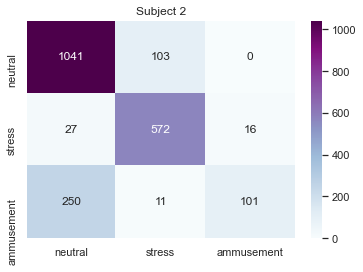

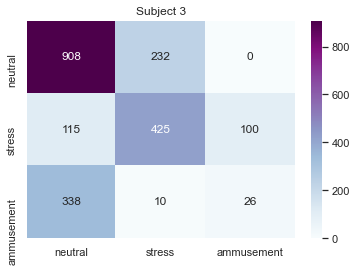

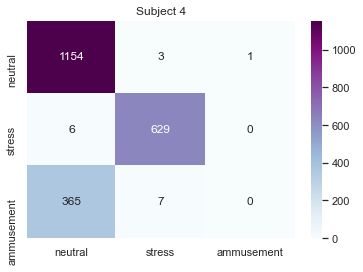

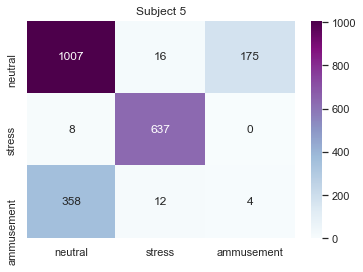

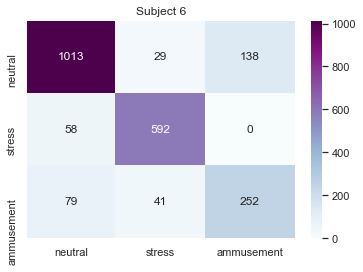

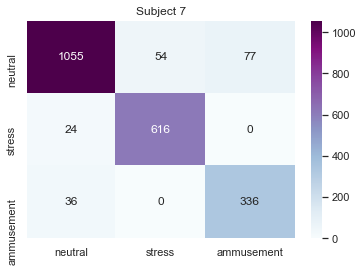

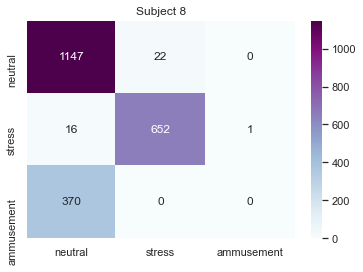

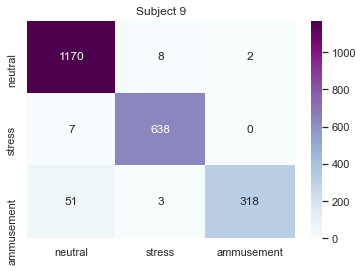

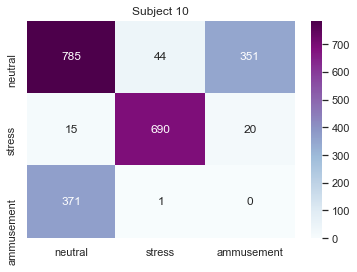

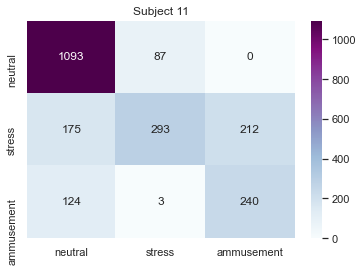

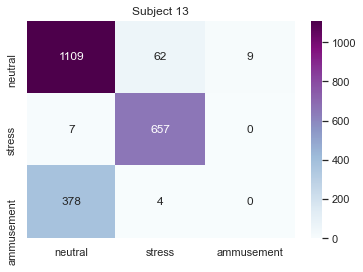

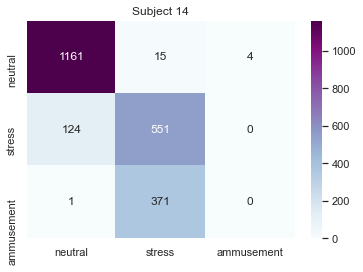

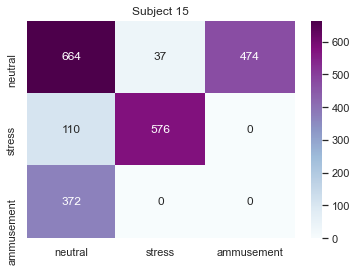

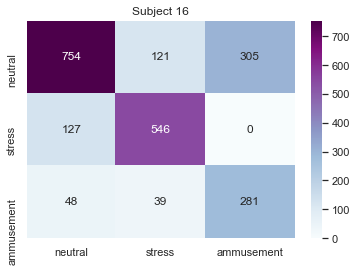

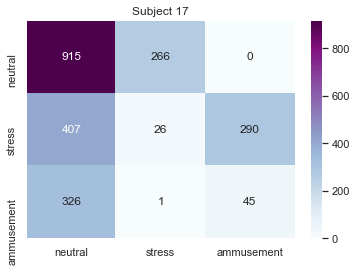

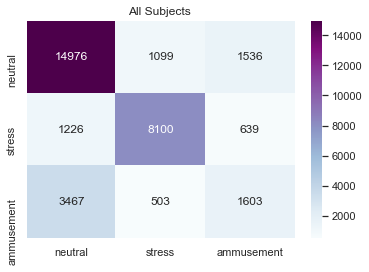

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

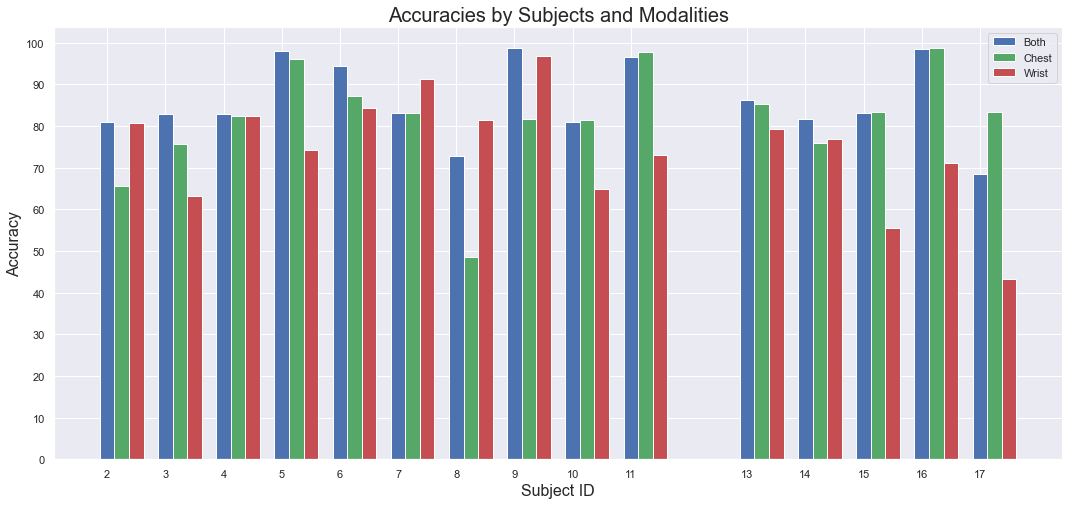

In [73]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

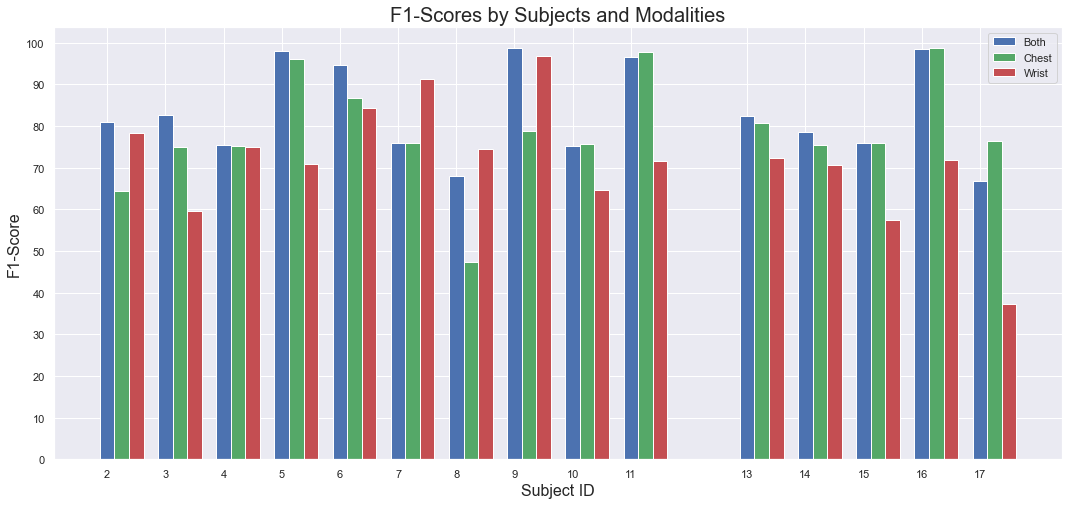

In [74]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])